In [1]:
# Import tutto quanto
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy

In [2]:
# LOADING DATA

df=pd.read_csv("ICU_Challenge_Dataset.csv", sep=",")
df_description = df.describe()
columns = df.columns
columns

Index(['recordid', 'SAPS-I', 'SOFA', 'In-hospital_death', 'Age', 'Gender',
       'Height', 'Weight', 'CCU', 'CSRU',
       ...
       'Platelets_last', 'TroponinI_last', 'TroponinT_last', 'WBC_last',
       'Weight_last', 'pH_last', 'MechVentStartTime', 'MechVentDuration',
       'MechVentLast8Hour', 'UrineOutputSum'],
      dtype='object', length=121)

In [3]:
# MISSING DATA - da esplorare
# print(df[df.columns[df.isna().any()]])
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
print(missing_value_df)

                         column_name  percent_missing
recordid                    recordid         0.000000
SAPS-I                        SAPS-I         0.000000
SOFA                            SOFA         0.000000
In-hospital_death  In-hospital_death         0.000000
Age                              Age         0.000000
...                              ...              ...
TroponinT_first      TroponinT_first        77.766667
Cholesterol_last    Cholesterol_last        92.133333
Cholesterol_first  Cholesterol_first        92.133333
TroponinI_last        TroponinI_last        95.250000
TroponinI_first      TroponinI_first        95.250000

[121 rows x 2 columns]


In [4]:
df_col_keep = missing_value_df[missing_value_df['percent_missing']<30]
df_col = df_col_keep['column_name']

df=df[df_col]
df

,recordid,SAPS-I,SOFA,In-hospital_death,Age,CCU,CSRU,SICU,Gender,BUN_first,...,NIDiasABP_first,NIMAP_highest,NIDiasABP_highest,NIDiasABP_last,pH_last,pH_first,PaCO2_first,PaCO2_last,PaO2_last,PaO2_first
0,132539,6,1,0,54.0,0,0,1,0.0,13.0,...,65.0,92.33,67.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN
1,132540,16,8,0,76.0,0,1,0,1.0,16.0,...,38.0,88.33,67.0,49.0,7.37,7.45,34.0,46.0,140.0,344.0
2,132541,21,11,0,44.0,0,0,0,0.0,8.0,...,84.0,110.00,95.0,84.0,7.47,7.51,37.0,37.0,173.0,65.0
3,132543,7,1,0,68.0,0,0,0,1.0,23.0,...,63.0,100.70,81.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN
4,132545,17,2,0,88.0,0,0,0,0.0,45.0,...,41.0,105.70,96.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,151939,19,6,1,52.0,0,0,1,1.0,11.0,...,NaN,NaN,NaN,NaN,7.46,7.43,37.0,32.0,119.0,368.0
5996,151383,13,2,0,90.0,1,0,0,0.0,20.0,...,80.0,117.30,100.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN
5997,149623,12,9,0,72.0,1,0,0,0.0,62.0,...,63.0,100.30,74.0,51.0,7.39,7.27,89.0,65.0,93.0,50.0
5998,145366,18,11,1,52.0,0,0,0,1.0,16.0,...,74.0,92.00,74.0,44.0,7.36,7.30,33.0,42.0,86.0,94.0


In [5]:
print(df['In-hospital_death'].value_counts())

0    5162
1     838
Name: In-hospital_death, dtype: int64


In [6]:
print(np.unique(df.dtypes))

int_var = list(df.columns[df.dtypes == np.int64])
float_var = list(df.columns[df.dtypes == np.float64])

cat_var = []
num_var = []
for cat in list(df.columns):
    if len(df[cat].unique()) <=3: #conta anche i Nan come valori
        cat_var.append(cat)
    else:
        num_var.append(cat)

categorical_df = df[cat_var]
numerical_df = df[num_var]

[dtype('int64') dtype('float64')]


In [7]:
#Normality test
#Hp0: normal distribution (p-value<0.05 => reject it)
import scipy.stats as sci
for x in list(numerical_df.columns):
    y=sci.normaltest(numerical_df[x], nan_policy='omit')
    print(x, '\n', y, '\n')

recordid 
 NormaltestResult(statistic=842.8952779362795, pvalue=9.281453324358711e-184) 

SAPS-I 
 NormaltestResult(statistic=178.46362453579428, pvalue=1.7665109011997907e-39) 

SOFA 
 NormaltestResult(statistic=145.41575069788357, pvalue=2.650763275105637e-32) 

Age 
 NormaltestResult(statistic=359.68535645125036, pvalue=7.858094294744039e-79) 

BUN_first 
 NormaltestResult(statistic=3229.820965379643, pvalue=0.0) 

Creatinine_last 
 NormaltestResult(statistic=4722.975745445371, pvalue=0.0) 

BUN_last 
 NormaltestResult(statistic=2725.806709376353, pvalue=0.0) 

Creatinine_first 
 NormaltestResult(statistic=5735.2033386169605, pvalue=0.0) 

HCT_first 
 NormaltestResult(statistic=44.06438668636649, pvalue=2.701095919471259e-10) 

HCT_last 
 NormaltestResult(statistic=375.8779347073141, pvalue=2.3941069297250362e-82) 

HR_first 
 NormaltestResult(statistic=296.5261930061873, pvalue=4.075259972210311e-65) 

HR_median 
 NormaltestResult(statistic=65.8838788512379, pvalue=4.93739058159336

In [8]:
#For non normal (all in this case) -> Wilcoxon-Mann-Whitney test
#Hp0: are they the same?

print('BUN\n', sci.mannwhitneyu(numerical_df['BUN_first'], numerical_df['BUN_last'], nan_policy='omit'))
#same
print('\n\nCreatinine\n', sci.mannwhitneyu(numerical_df['Creatinine_first'], numerical_df['Creatinine_last'], nan_policy='omit'))
#same
print('\n\nHCT\n', sci.mannwhitneyu(numerical_df['HCT_first'], numerical_df['HCT_last'], nan_policy='omit'))
#different
print('\n\nHR\n', sci.mannwhitneyu(numerical_df['HR_first'], numerical_df['HR_last'], nan_policy='omit'))
#different
print('\n\nTemp\n', sci.mannwhitneyu(numerical_df['Temp_first'], numerical_df['Temp_last'], nan_policy='omit'))
#different
print('\n\nGCS\n', sci.mannwhitneyu(numerical_df['GCS_first'], numerical_df['GCS_last'], nan_policy='omit'))
#different
print('\n\nPlatelets\n', sci.mannwhitneyu(numerical_df['Platelets_first'], numerical_df['Platelets_last'], nan_policy='omit'))
#different
print('\n\nHCO3\n', sci.mannwhitneyu(numerical_df['HCO3_first'], numerical_df['HCO3_last'], nan_policy='omit'))
#different
print('\n\nNa\n', sci.mannwhitneyu(numerical_df['Na_first'], numerical_df['Na_last'], nan_policy='omit'))
#same
print('\n\nK\n', sci.mannwhitneyu(numerical_df['K_first'], numerical_df['K_last'], nan_policy='omit'))
#different
print('\n\nWBC\n', sci.mannwhitneyu(numerical_df['WBC_first'], numerical_df['WBC_last'], nan_policy='omit'))
#different
print('\n\nMg\n', sci.mannwhitneyu(numerical_df['Mg_first'], numerical_df['Mg_last'], nan_policy='omit'))
#different
print('\n\nGlucose\n', sci.mannwhitneyu(numerical_df['Glucose_first'], numerical_df['Glucose_last'], nan_policy='omit'))
#different
print('\n\nNISysABP\n', sci.mannwhitneyu(numerical_df['NISysABP_first'], numerical_df['NISysABP_last'], nan_policy='omit'))
#different
print('\n\nNIMAP\n', sci.mannwhitneyu(numerical_df['NIMAP_first'], numerical_df['NIMAP_last'], nan_policy='omit'))
#different
print('\n\nNIDiasABP\n', sci.mannwhitneyu(numerical_df['NIDiasABP_first'], numerical_df['NIDiasABP_last'], nan_policy='omit'))
#different
print('\n\npH\n', sci.mannwhitneyu(numerical_df['pH_first'], numerical_df['pH_last'], nan_policy='omit'))
#different
print('\n\nPaO2\n', sci.mannwhitneyu(numerical_df['PaO2_first'], numerical_df['PaO2_last'], nan_policy='omit'))
#different
print('\n\nPaCO2\n', sci.mannwhitneyu(numerical_df['PaCO2_first'], numerical_df['PaCO2_last'], nan_policy='omit'))
#different

#print('\n\nMAP\n', sci.mannwhitneyu(numerical_df['MAP_first'], numerical_df['MAP_last'], nan_policy='omit'))
#different
#print('\n\nSysABP\n', sci.mannwhitneyu(numerical_df['SysABP_first'], numerical_df['SysABP_last'], nan_policy='omit'))
#different
#print('\n\nDiasABP\n', sci.mannwhitneyu(numerical_df['DiasABP_first'], numerical_df['DiasABP_last'], nan_policy='omit'))
#different
#print('\n\nWeight\n', sci.mannwhitneyu(numerical_df['Weight_first'], numerical_df['Weight_last'], nan_policy='omit'))
#same
#print('\n\nFiO2\n', sci.mannwhitneyu(numerical_df['FiO2_first'], numerical_df['FiO2_last'], nan_policy='omit'))
#different
#print('\n\nLactate\n', sci.mannwhitneyu(numerical_df['Lactate_first'], numerical_df['Lactate_last'], nan_policy='omit'))
#different

BUN
 MannwhitneyuResult(statistic=17614605.0, pvalue=0.29981721794226535)


Creatinine
 MannwhitneyuResult(statistic=17557180.0, pvalue=0.4663447229665394)


HCT
 MannwhitneyuResult(statistic=19566419.0, pvalue=3.558726270824122e-31)


HR
 MannwhitneyuResult(statistic=19187529.5, pvalue=2.0600174229886776e-22)


Temp
 MannwhitneyuResult(statistic=12305599.0, pvalue=2.892439692928371e-166)


GCS
 MannwhitneyuResult(statistic=12970276.0, pvalue=4.004574406370745e-140)


Platelets
 MannwhitneyuResult(statistic=19870854.0, pvalue=1.479965468395165e-41)


HCO3
 MannwhitneyuResult(statistic=14709169.0, pvalue=4.7381289527075e-46)


Na
 MannwhitneyuResult(statistic=17335528.5, pvalue=0.9434850748661205)


K
 MannwhitneyuResult(statistic=18566664.0, pvalue=4.796755746113763e-14)


WBC
 MannwhitneyuResult(statistic=17789766.5, pvalue=0.0008012400962805928)


Mg
 MannwhitneyuResult(statistic=13532952.0, pvalue=4.08955520274117e-86)


Glucose
 MannwhitneyuResult(statistic=19876694.5, pvalue=1.883

In [9]:
#df = df.drop(['BUN_first', 'Creatinine_first', 'Na_first', 'Weight_first'], axis=1)
df = df.drop(['BUN_first', 'Creatinine_first', 'Na_first'], axis=1)
df_copia = df
df

,recordid,SAPS-I,SOFA,In-hospital_death,Age,CCU,CSRU,SICU,Gender,Creatinine_last,...,NIDiasABP_first,NIMAP_highest,NIDiasABP_highest,NIDiasABP_last,pH_last,pH_first,PaCO2_first,PaCO2_last,PaO2_last,PaO2_first
0,132539,6,1,0,54.0,0,0,1,0.0,0.7,...,65.0,92.33,67.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN
1,132540,16,8,0,76.0,0,1,0,1.0,1.3,...,38.0,88.33,67.0,49.0,7.37,7.45,34.0,46.0,140.0,344.0
2,132541,21,11,0,44.0,0,0,0,0.0,0.3,...,84.0,110.00,95.0,84.0,7.47,7.51,37.0,37.0,173.0,65.0
3,132543,7,1,0,68.0,0,0,0,1.0,0.7,...,63.0,100.70,81.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN
4,132545,17,2,0,88.0,0,0,0,0.0,1.0,...,41.0,105.70,96.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,151939,19,6,1,52.0,0,0,1,1.0,0.6,...,NaN,NaN,NaN,NaN,7.46,7.43,37.0,32.0,119.0,368.0
5996,151383,13,2,0,90.0,1,0,0,0.0,0.7,...,80.0,117.30,100.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN
5997,149623,12,9,0,72.0,1,0,0,0.0,2.8,...,63.0,100.30,74.0,51.0,7.39,7.27,89.0,65.0,93.0,50.0
5998,145366,18,11,1,52.0,0,0,0,1.0,1.0,...,74.0,92.00,74.0,44.0,7.36,7.30,33.0,42.0,86.0,94.0


In [10]:
df['HCT_diff'] = df['HCT_first'] - df['HCT_last']
df['HR_diff'] = df['HR_first'] - df['HR_last']
df['Temp_diff'] = df['Temp_first'] - df['Temp_last']
df['GCS_diff'] = df['GCS_first'] - df['GCS_last']
df['Platelets_diff'] = df['Platelets_first'] - df['Platelets_last']
df['HCO3_diff'] = df['HCO3_first'] - df['HCO3_last']
df['K_diff'] = df['K_first'] - df['K_last']
df['WBC_diff'] = df['WBC_first'] - df['WBC_last']
df['Mg_diff'] = df['Mg_first'] - df['Mg_last']
df['Glucose_diff'] = df['Glucose_first'] - df['Glucose_last']
df['NISysABP_diff'] = df['NISysABP_first'] - df['NISysABP_last']
df['NIDiasABP_diff'] = df['NIDiasABP_first'] - df['NIDiasABP_last']
df['pH_diff'] = df['pH_first'] - df['pH_last']
df['PaO2_diff'] = df['PaO2_first'] - df['PaO2_last']
df['PaCO2_diff'] = df['PaCO2_first'] - df['PaCO2_last']
#df['MAP_diff'] = df['MAP_first'] - df['MAP_last']
#df['SysABP_diff'] = df['SysABP_first'] - df['SysABP_last']
#df['DiasABP_diff'] = df['DiasABP_first'] - df['DiasABP_last']
#df['FiO2_diff'] = df['FiO2_first'] - df['FiO2_last']
#df['Lactate_diff'] = df['Lactate_first'] - df['Lactate_last']

#df = df.drop(['HCT_first', 'HCT_last', 'HR_first', 'HR_last', 'Temp_first', 'Temp_last', 'GCS_first', 'GCS_last', 'Platelets_first', 'Platelets_last', 'HCO3_first', 'HCO3_last', 'K_first', 'K_last', 'WBC_first', 'WBC_last', 'Mg_first', 'Mg_last', 'Glucose_first', 'Glucose_last', 'NISysABP_first', 'NISysABP_last', 'NIDiasABP_first', 'NIDiasABP_last', 'pH_first', 'pH_last', 'PaO2_first', 'PaO2_last', 'PaCO2_first', 'PaCO2_last',  'MAP_first', 'MAP_last', 'SysABP_first', 'SysABP_last', 'DiasABP_first', 'DiasABP_last', 'FiO2_first', 'FiO2_last', 'Lactate_first', 'Lactate_last' ], axis=1)
df = df.drop(['HCT_first', 'HCT_last', 'HR_first', 'HR_last', 'Temp_first', 'Temp_last', 'GCS_first', 'GCS_last', 'Platelets_first', 'Platelets_last', 'HCO3_first', 'HCO3_last', 'K_first', 'K_last', 'WBC_first', 'WBC_last', 'Mg_first', 'Mg_last', 'Glucose_first', 'Glucose_last', 'NISysABP_first', 'NISysABP_last', 'NIDiasABP_first', 'NIDiasABP_last', 'pH_first', 'pH_last', 'PaO2_first', 'PaO2_last', 'PaCO2_first', 'PaCO2_last'], axis=1)
df

,recordid,SAPS-I,SOFA,In-hospital_death,Age,CCU,CSRU,SICU,Gender,Creatinine_last,...,HCO3_diff,K_diff,WBC_diff,Mg_diff,Glucose_diff,NISysABP_diff,NIDiasABP_diff,pH_diff,PaO2_diff,PaCO2_diff
0,132539,6,1,0,54.0,0,0,1,0.0,0.7,...,-2.0,0.4,1.8,-0.4,90.0,19.0,10.0,NaN,NaN,NaN
1,132540,16,8,0,76.0,0,1,0,1.0,1.3,...,-3.0,0.8,-5.9,1.2,-41.0,-35.0,-11.0,0.08,204.0,-12.0
2,132541,21,11,0,44.0,0,0,0,0.0,0.3,...,-1.0,-0.4,-2.0,0.2,-2.0,-8.0,0.0,0.04,-108.0,0.0
3,132543,7,1,0,68.0,0,0,0,1.0,0.7,...,0.0,0.2,3.6,0.2,12.0,0.0,-18.0,NaN,NaN,NaN
4,132545,17,2,0,88.0,0,0,0,0.0,1.0,...,-2.0,1.9,-1.0,-0.1,21.0,9.0,-1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,151939,19,6,1,52.0,0,0,1,1.0,0.6,...,-1.0,0.7,3.0,-0.4,1.0,NaN,NaN,-0.03,249.0,5.0
5996,151383,13,2,0,90.0,1,0,0,0.0,0.7,...,1.0,-0.9,0.3,0.2,34.0,19.0,5.0,NaN,NaN,NaN
5997,149623,12,9,0,72.0,1,0,0,0.0,2.8,...,-4.0,0.6,-3.1,0.1,11.0,-4.0,12.0,-0.12,-43.0,24.0
5998,145366,18,11,1,52.0,0,0,0,1.0,1.0,...,-7.0,-0.9,-2.7,-0.6,-13.0,41.0,30.0,-0.06,8.0,-9.0


In [11]:
def plot_correlation_heatmap(df):
    plt.figure(figsize=(20,20))
    corr = df.corr()
    ax = sns.heatmap(
        corr,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True, annot=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )
    ax.set_yticklabels(
        ax.get_yticklabels(),
        rotation=45,

    );

In [12]:
cat_var = []
num_var = []
for cat in list(df.columns):
    if len(df[cat].unique()) <=3: #conta anche i Nan come valori
        cat_var.append(cat)
    else:
        num_var.append(cat)

categorical_df = df[cat_var]
numerical_df = df[num_var]

In [13]:
numerical_df

,recordid,SAPS-I,SOFA,Age,Creatinine_last,BUN_last,HR_median,HR_highest,HR_lowest,Temp_median,...,HCO3_diff,K_diff,WBC_diff,Mg_diff,Glucose_diff,NISysABP_diff,NIDiasABP_diff,pH_diff,PaO2_diff,PaCO2_diff
0,132539,6,1,54.0,0.7,8.0,73.0,86.0,58.0,37.70,...,-2.0,0.4,1.8,-0.4,90.0,19.0,10.0,NaN,NaN,NaN
1,132540,16,8,76.0,1.3,21.0,80.0,90.0,65.0,37.45,...,-3.0,0.8,-5.9,1.2,-41.0,-35.0,-11.0,0.08,204.0,-12.0
2,132541,21,11,44.0,0.3,3.0,85.5,113.0,57.0,37.85,...,-1.0,-0.4,-2.0,0.2,-2.0,-8.0,0.0,0.04,-108.0,0.0
3,132543,7,1,68.0,0.7,10.0,74.0,88.0,57.0,36.40,...,0.0,0.2,3.6,0.2,12.0,0.0,-18.0,NaN,NaN,NaN
4,132545,17,2,88.0,1.0,25.0,73.0,94.0,65.0,37.00,...,-2.0,1.9,-1.0,-0.1,21.0,9.0,-1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,151939,19,6,52.0,0.6,9.0,101.0,132.0,59.0,36.70,...,-1.0,0.7,3.0,-0.4,1.0,NaN,NaN,-0.03,249.0,5.0
5996,151383,13,2,90.0,0.7,23.0,108.0,124.0,84.0,36.75,...,1.0,-0.9,0.3,0.2,34.0,19.0,5.0,NaN,NaN,NaN
5997,149623,12,9,72.0,2.8,67.0,100.0,123.0,79.0,37.05,...,-4.0,0.6,-3.1,0.1,11.0,-4.0,12.0,-0.12,-43.0,24.0
5998,145366,18,11,52.0,1.0,25.0,108.0,143.0,68.0,36.90,...,-7.0,-0.9,-2.7,-0.6,-13.0,41.0,30.0,-0.06,8.0,-9.0


In [14]:
to_drop = []

for x in list(numerical_df.columns):
    if 'highest' in x:
        to_drop.append(x)
    if 'median' in x:
        to_drop.append(x)
    if 'lowest' in x:
        to_drop.append(x)
to_drop

['HR_median',
 'HR_highest',
 'HR_lowest',
 'Temp_median',
 'Temp_highest',
 'GCS_highest',
 'Temp_lowest',
 'GCS_lowest',
 'GCS_median',
 'Glucose_lowest',
 'Glucose_median',
 'Glucose_highest',
 'NISysABP_median',
 'NISysABP_highest',
 'NISysABP_lowest',
 'NIDiasABP_lowest',
 'NIMAP_lowest',
 'NIMAP_median',
 'NIDiasABP_median',
 'NIMAP_highest',
 'NIDiasABP_highest']

In [15]:
numerical_df = numerical_df.drop(to_drop, axis=1)
numerical_df

,recordid,SAPS-I,SOFA,Age,Creatinine_last,BUN_last,Na_last,Weight,NIMAP_first,NIMAP_last,...,HCO3_diff,K_diff,WBC_diff,Mg_diff,Glucose_diff,NISysABP_diff,NIDiasABP_diff,pH_diff,PaO2_diff,PaCO2_diff
0,132539,6,1,54.0,0.7,8.0,136.0,NaN,92.33,79.33,...,-2.0,0.4,1.8,-0.4,90.0,19.0,10.0,NaN,NaN,NaN
1,132540,16,8,76.0,1.3,21.0,135.0,76.0,49.33,68.33,...,-3.0,0.8,-5.9,1.2,-41.0,-35.0,-11.0,0.08,204.0,-12.0
2,132541,21,11,44.0,0.3,3.0,138.0,56.7,100.30,103.00,...,-1.0,-0.4,-2.0,0.2,-2.0,-8.0,0.0,0.04,-108.0,0.0
3,132543,7,1,68.0,0.7,10.0,137.0,84.6,86.67,98.67,...,0.0,0.2,3.6,0.2,12.0,0.0,-18.0,NaN,NaN,NaN
4,132545,17,2,88.0,1.0,25.0,139.0,NaN,75.33,73.00,...,-2.0,1.9,-1.0,-0.1,21.0,9.0,-1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,151939,19,6,52.0,0.6,9.0,140.0,80.0,NaN,NaN,...,-1.0,0.7,3.0,-0.4,1.0,NaN,NaN,-0.03,249.0,5.0
5996,151383,13,2,90.0,0.7,23.0,129.0,72.0,98.67,89.00,...,1.0,-0.9,0.3,0.2,34.0,19.0,5.0,NaN,NaN,NaN
5997,149623,12,9,72.0,2.8,67.0,144.0,185.0,90.33,83.67,...,-4.0,0.6,-3.1,0.1,11.0,-4.0,12.0,-0.12,-43.0,24.0
5998,145366,18,11,52.0,1.0,25.0,134.0,95.9,92.00,58.33,...,-7.0,-0.9,-2.7,-0.6,-13.0,41.0,30.0,-0.06,8.0,-9.0


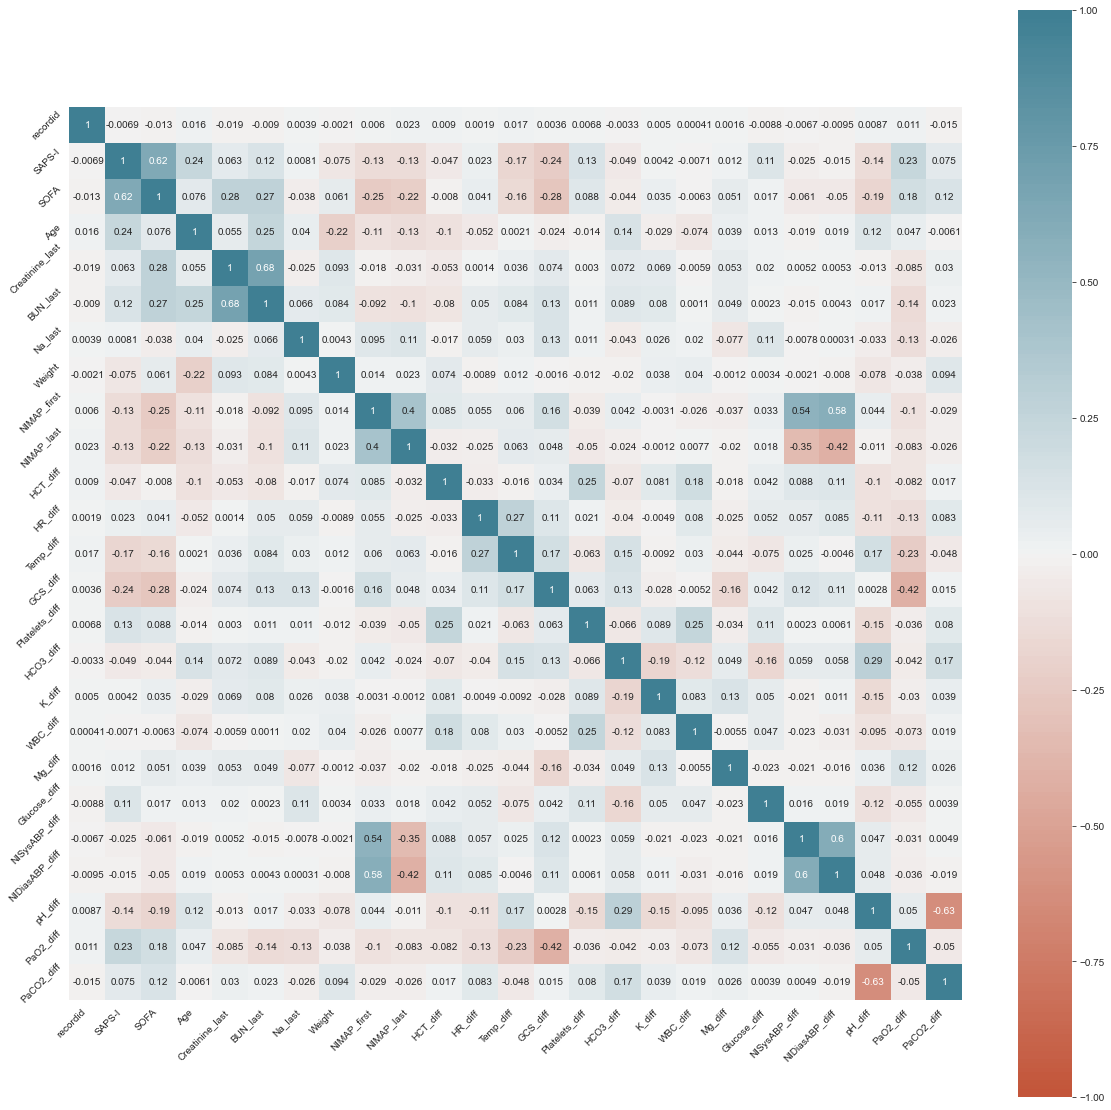

In [16]:
plot_correlation_heatmap(numerical_df)

In [17]:
mean_values=numerical_df.mean()
mean_values

recordid           140965.097167
SAPS-I                 14.170333
SOFA                    6.345500
Age                    64.568500
Creatinine_last         1.358106
BUN_last               25.456378
Na_last               138.878016
Weight                 81.332485
NIMAP_first            79.479458
NIMAP_last             77.053711
HCT_diff                1.116401
HR_diff                 3.770595
Temp_diff              -0.454552
GCS_diff               -2.301052
Platelets_diff         23.628346
HCO3_diff              -1.078138
K_diff                  0.113969
WBC_diff                0.609017
Mg_diff                -0.109279
Glucose_diff           20.407496
NISysABP_diff           2.054178
NIDiasABP_diff          2.744559
pH_diff                -0.029230
PaO2_diff              86.523344
PaCO2_diff              1.379640
dtype: float64

In [18]:
numerical_df = numerical_df.fillna(value=mean_values)
numerical_df.isnull().sum()

recordid           0
SAPS-I             0
SOFA               0
Age                0
Creatinine_last    0
BUN_last           0
Na_last            0
Weight             0
NIMAP_first        0
NIMAP_last         0
HCT_diff           0
HR_diff            0
Temp_diff          0
GCS_diff           0
Platelets_diff     0
HCO3_diff          0
K_diff             0
WBC_diff           0
Mg_diff            0
Glucose_diff       0
NISysABP_diff      0
NIDiasABP_diff     0
pH_diff            0
PaO2_diff          0
PaCO2_diff         0
dtype: int64

array([[<AxesSubplot:title={'center':'recordid'}>,
        <AxesSubplot:title={'center':'SAPS-I'}>,
        <AxesSubplot:title={'center':'SOFA'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Creatinine_last'}>],
       [<AxesSubplot:title={'center':'BUN_last'}>,
        <AxesSubplot:title={'center':'Na_last'}>,
        <AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'NIMAP_first'}>,
        <AxesSubplot:title={'center':'NIMAP_last'}>],
       [<AxesSubplot:title={'center':'HCT_diff'}>,
        <AxesSubplot:title={'center':'HR_diff'}>,
        <AxesSubplot:title={'center':'Temp_diff'}>,
        <AxesSubplot:title={'center':'GCS_diff'}>,
        <AxesSubplot:title={'center':'Platelets_diff'}>],
       [<AxesSubplot:title={'center':'HCO3_diff'}>,
        <AxesSubplot:title={'center':'K_diff'}>,
        <AxesSubplot:title={'center':'WBC_diff'}>,
        <AxesSubplot:title={'center':'Mg_diff'}>,
        <AxesSubplot:title

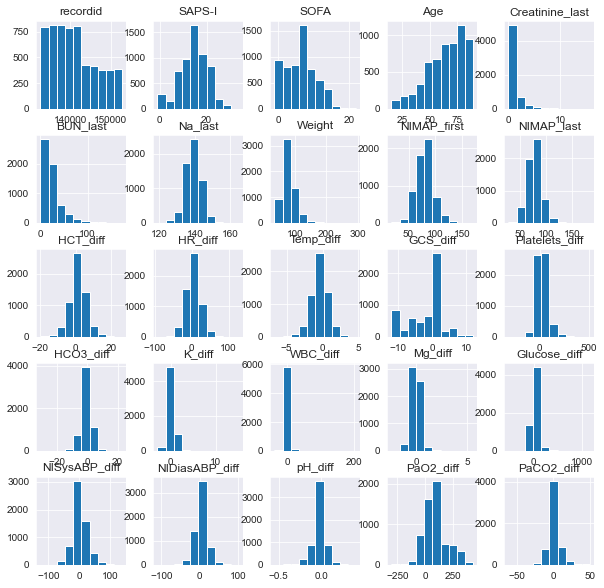

In [21]:
numerical_df.hist(figsize=(10,10))

C:\Users\Alice Donati\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

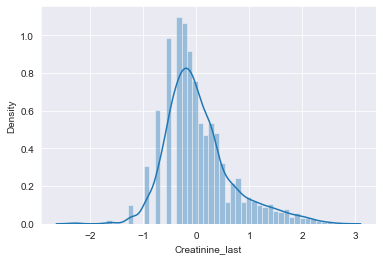

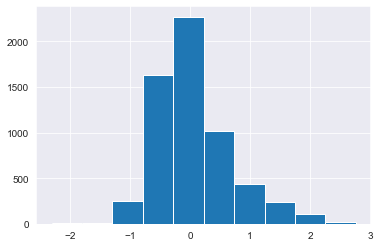

In [20]:
import matplotlib.pyplot as plt
crea_log= np.log(numerical_df['Creatinine_last'])
sns.distplot(crea_log)
fig = plt.figure()
crea_log.hist()

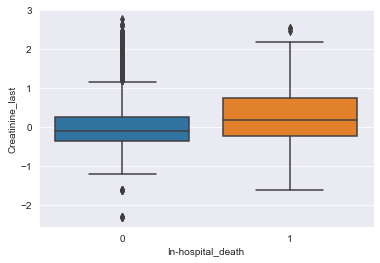

In [22]:
import seaborn as sns
sns.boxplot(x=categorical_df['In-hospital_death'], y=crea_log)
plt.show()

<AxesSubplot:xlabel='In-hospital_death', ylabel='Creatinine_last'>

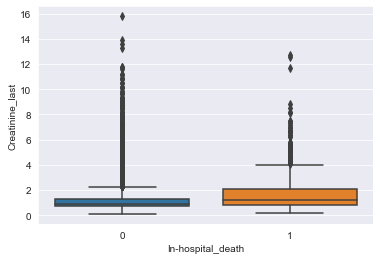

In [23]:
sns.boxplot(x=categorical_df['In-hospital_death'], y=numerical_df['Creatinine_last'])

In [24]:
numerical_df=numerical_df.drop('Creatinine_last', axis=1)
numerical_df.insert(2, 'Creatinine_last_log', crea_log)
numerical_df

,recordid,SAPS-I,Creatinine_last_log,SOFA,Age,BUN_last,Na_last,Weight,NIMAP_first,NIMAP_last,...,HCO3_diff,K_diff,WBC_diff,Mg_diff,Glucose_diff,NISysABP_diff,NIDiasABP_diff,pH_diff,PaO2_diff,PaCO2_diff
0,132539,6,-0.356675,1,54.0,8.0,136.0,81.332485,92.330000,79.330000,...,-2.0,0.4,1.8,-0.4,90.0,19.000000,10.000000,-0.02923,86.523344,1.37964
1,132540,16,0.262364,8,76.0,21.0,135.0,76.000000,49.330000,68.330000,...,-3.0,0.8,-5.9,1.2,-41.0,-35.000000,-11.000000,0.08000,204.000000,-12.00000
2,132541,21,-1.203973,11,44.0,3.0,138.0,56.700000,100.300000,103.000000,...,-1.0,-0.4,-2.0,0.2,-2.0,-8.000000,0.000000,0.04000,-108.000000,0.00000
3,132543,7,-0.356675,1,68.0,10.0,137.0,84.600000,86.670000,98.670000,...,0.0,0.2,3.6,0.2,12.0,0.000000,-18.000000,-0.02923,86.523344,1.37964
4,132545,17,0.000000,2,88.0,25.0,139.0,81.332485,75.330000,73.000000,...,-2.0,1.9,-1.0,-0.1,21.0,9.000000,-1.000000,-0.02923,86.523344,1.37964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,151939,19,-0.510826,6,52.0,9.0,140.0,80.000000,79.479458,77.053711,...,-1.0,0.7,3.0,-0.4,1.0,2.054178,2.744559,-0.03000,249.000000,5.00000
5996,151383,13,-0.356675,2,90.0,23.0,129.0,72.000000,98.670000,89.000000,...,1.0,-0.9,0.3,0.2,34.0,19.000000,5.000000,-0.02923,86.523344,1.37964
5997,149623,12,1.029619,9,72.0,67.0,144.0,185.000000,90.330000,83.670000,...,-4.0,0.6,-3.1,0.1,11.0,-4.000000,12.000000,-0.12000,-43.000000,24.00000
5998,145366,18,0.000000,11,52.0,25.0,134.0,95.900000,92.000000,58.330000,...,-7.0,-0.9,-2.7,-0.6,-13.0,41.000000,30.000000,-0.06000,8.000000,-9.00000


In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(numerical_df)
scaled_df=pd.DataFrame(scaler.transform(numerical_df))
scaled_df.columns = numerical_df.columns

scaled_df

#x = numerical_df.values #returns a numpy array
#s_scaler = StandardScaler()
#x_scaled = s_scaler.fit_transform(x)
#df_scaled = pd.DataFrame(data=x_scaled)
#df_scaled

,recordid,SAPS-I,Creatinine_last_log,SOFA,Age,BUN_last,Na_last,Weight,NIMAP_first,NIMAP_last,...,HCO3_diff,K_diff,WBC_diff,Mg_diff,Glucose_diff,NISysABP_diff,NIDiasABP_diff,pH_diff,PaO2_diff,PaCO2_diff
0,-1.508884,-1.342626,-0.629755,-1.264658,-0.604645,-0.854315,-0.669431,-6.327279e-16,0.778279,1.602599e-01,...,-0.258884,0.379723,0.205010,-0.660524,0.886376,0.720286,4.397396e-01,-8.646334e-17,1.318287e-16,2.766267e-17
1,-1.508705,0.300668,0.333993,0.391428,0.654019,-0.218095,-0.902033,-2.374250e-01,-1.825970,-6.141845e-01,...,-0.539712,0.910746,-1.120432,2.974703,-0.782126,-1.574997,-8.330336e-01,1.361086e+00,1.089787e+00,-1.666857e+00
2,-1.508526,1.122315,-1.948867,1.101179,-1.176765,-1.099015,-0.204228,-1.096743e+00,1.260974,1.826724e+00,...,0.021943,-0.682324,-0.449104,0.702686,-0.285397,-0.427355,-1.663429e-01,8.626583e-01,-1.804519e+00,-1.718778e-01
3,-1.508168,-1.178297,-0.629755,-1.264658,0.196323,-0.756435,-0.436830,1.454837e-01,0.435488,1.521874e+00,...,0.302771,0.114211,0.514854,0.702686,-0.107083,-0.087313,-1.257291e+00,-8.646334e-17,1.318287e-16,2.766267e-17
4,-1.507810,0.464998,-0.074468,-1.028074,1.340564,-0.022335,0.028374,-6.327279e-16,-0.251308,-2.853976e-01,...,-0.258884,2.371061,-0.276969,0.021081,0.007547,0.295234,-2.269512e-01,-8.646334e-17,1.318287e-16,2.766267e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.965126,0.793656,-0.869744,-0.081740,-0.719069,-0.805375,0.260976,-5.932794e-02,0.000000,1.000502e-15,...,0.021943,0.777991,0.411573,-0.660524,-0.247187,0.000000,-2.691547e-17,-9.589378e-03,1.507234e+00,4.510303e-01
5996,1.865562,-0.192320,-0.629755,-1.028074,1.454988,-0.120215,-2.297644,-4.155221e-01,1.162255,8.410670e-01,...,0.583599,-1.346103,-0.053193,0.702686,0.173123,0.720286,1.366983e-01,-8.646334e-17,1.318287e-16,2.766267e-17
5997,1.550394,-0.356650,1.528490,0.628011,0.425171,2.033144,1.191382,4.615720e+00,0.657152,4.658134e-01,...,-0.820540,0.645235,-0.638453,0.475485,-0.119820,-0.257334,5.609560e-01,-1.131051e+00,-1.201539e+00,2.818081e+00
5998,0.788082,0.629327,-0.074468,1.101179,-0.719069,-0.022335,-1.134635,6.486079e-01,0.758293,-1.318225e+00,...,-1.663024,-1.346103,-0.569599,-1.114927,-0.425500,1.655402,1.651904e+00,-3.834098e-01,-7.284314e-01,-1.293112e+00


In [26]:
frames=[scaled_df, categorical_df]
df_2 = pd.concat(frames, axis=1)
df_2

,recordid,SAPS-I,Creatinine_last_log,SOFA,Age,BUN_last,Na_last,Weight,NIMAP_first,NIMAP_last,...,NISysABP_diff,NIDiasABP_diff,pH_diff,PaO2_diff,PaCO2_diff,In-hospital_death,CCU,CSRU,SICU,Gender
0,-1.508884,-1.342626,-0.629755,-1.264658,-0.604645,-0.854315,-0.669431,-6.327279e-16,0.778279,1.602599e-01,...,0.720286,4.397396e-01,-8.646334e-17,1.318287e-16,2.766267e-17,0,0,0,1,0.0
1,-1.508705,0.300668,0.333993,0.391428,0.654019,-0.218095,-0.902033,-2.374250e-01,-1.825970,-6.141845e-01,...,-1.574997,-8.330336e-01,1.361086e+00,1.089787e+00,-1.666857e+00,0,0,1,0,1.0
2,-1.508526,1.122315,-1.948867,1.101179,-1.176765,-1.099015,-0.204228,-1.096743e+00,1.260974,1.826724e+00,...,-0.427355,-1.663429e-01,8.626583e-01,-1.804519e+00,-1.718778e-01,0,0,0,0,0.0
3,-1.508168,-1.178297,-0.629755,-1.264658,0.196323,-0.756435,-0.436830,1.454837e-01,0.435488,1.521874e+00,...,-0.087313,-1.257291e+00,-8.646334e-17,1.318287e-16,2.766267e-17,0,0,0,0,1.0
4,-1.507810,0.464998,-0.074468,-1.028074,1.340564,-0.022335,0.028374,-6.327279e-16,-0.251308,-2.853976e-01,...,0.295234,-2.269512e-01,-8.646334e-17,1.318287e-16,2.766267e-17,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.965126,0.793656,-0.869744,-0.081740,-0.719069,-0.805375,0.260976,-5.932794e-02,0.000000,1.000502e-15,...,0.000000,-2.691547e-17,-9.589378e-03,1.507234e+00,4.510303e-01,1,0,0,1,1.0
5996,1.865562,-0.192320,-0.629755,-1.028074,1.454988,-0.120215,-2.297644,-4.155221e-01,1.162255,8.410670e-01,...,0.720286,1.366983e-01,-8.646334e-17,1.318287e-16,2.766267e-17,0,1,0,0,0.0
5997,1.550394,-0.356650,1.528490,0.628011,0.425171,2.033144,1.191382,4.615720e+00,0.657152,4.658134e-01,...,-0.257334,5.609560e-01,-1.131051e+00,-1.201539e+00,2.818081e+00,0,1,0,0,0.0
5998,0.788082,0.629327,-0.074468,1.101179,-0.719069,-0.022335,-1.134635,6.486079e-01,0.758293,-1.318225e+00,...,1.655402,1.651904e+00,-3.834098e-01,-7.284314e-01,-1.293112e+00,1,0,0,0,1.0


In [27]:
categorical_df.isnull().sum()

In-hospital_death    0
CCU                  0
CSRU                 0
SICU                 0
Gender               6
dtype: int64

In [28]:
#tolgo 6 righe con genere nan
indexNames = df_2[df_2['Gender'].isnull()].index
df_2.drop(indexNames , inplace=True)
df_2

,recordid,SAPS-I,Creatinine_last_log,SOFA,Age,BUN_last,Na_last,Weight,NIMAP_first,NIMAP_last,...,NISysABP_diff,NIDiasABP_diff,pH_diff,PaO2_diff,PaCO2_diff,In-hospital_death,CCU,CSRU,SICU,Gender
0,-1.508884,-1.342626,-0.629755,-1.264658,-0.604645,-0.854315,-0.669431,-6.327279e-16,0.778279,1.602599e-01,...,0.720286,4.397396e-01,-8.646334e-17,1.318287e-16,2.766267e-17,0,0,0,1,0.0
1,-1.508705,0.300668,0.333993,0.391428,0.654019,-0.218095,-0.902033,-2.374250e-01,-1.825970,-6.141845e-01,...,-1.574997,-8.330336e-01,1.361086e+00,1.089787e+00,-1.666857e+00,0,0,1,0,1.0
2,-1.508526,1.122315,-1.948867,1.101179,-1.176765,-1.099015,-0.204228,-1.096743e+00,1.260974,1.826724e+00,...,-0.427355,-1.663429e-01,8.626583e-01,-1.804519e+00,-1.718778e-01,0,0,0,0,0.0
3,-1.508168,-1.178297,-0.629755,-1.264658,0.196323,-0.756435,-0.436830,1.454837e-01,0.435488,1.521874e+00,...,-0.087313,-1.257291e+00,-8.646334e-17,1.318287e-16,2.766267e-17,0,0,0,0,1.0
4,-1.507810,0.464998,-0.074468,-1.028074,1.340564,-0.022335,0.028374,-6.327279e-16,-0.251308,-2.853976e-01,...,0.295234,-2.269512e-01,-8.646334e-17,1.318287e-16,2.766267e-17,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.965126,0.793656,-0.869744,-0.081740,-0.719069,-0.805375,0.260976,-5.932794e-02,0.000000,1.000502e-15,...,0.000000,-2.691547e-17,-9.589378e-03,1.507234e+00,4.510303e-01,1,0,0,1,1.0
5996,1.865562,-0.192320,-0.629755,-1.028074,1.454988,-0.120215,-2.297644,-4.155221e-01,1.162255,8.410670e-01,...,0.720286,1.366983e-01,-8.646334e-17,1.318287e-16,2.766267e-17,0,1,0,0,0.0
5997,1.550394,-0.356650,1.528490,0.628011,0.425171,2.033144,1.191382,4.615720e+00,0.657152,4.658134e-01,...,-0.257334,5.609560e-01,-1.131051e+00,-1.201539e+00,2.818081e+00,0,1,0,0,0.0
5998,0.788082,0.629327,-0.074468,1.101179,-0.719069,-0.022335,-1.134635,6.486079e-01,0.758293,-1.318225e+00,...,1.655402,1.651904e+00,-3.834098e-01,-7.284314e-01,-1.293112e+00,1,0,0,0,1.0


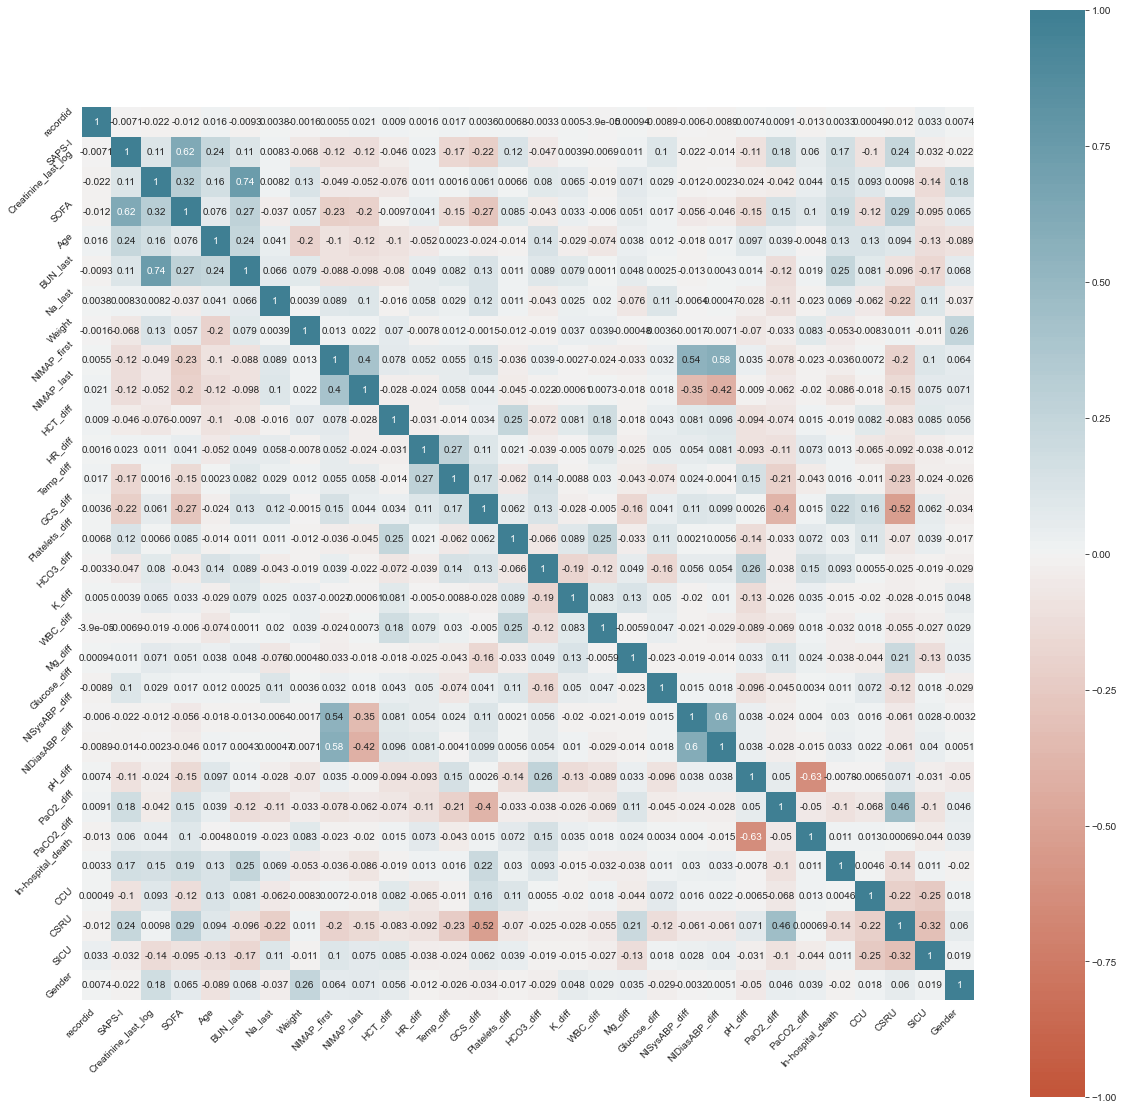

In [30]:
plot_correlation_heatmap(df_2)

In [31]:
df_2=df_2.drop(['recordid'], axis=1)
df_2

,SAPS-I,Creatinine_last_log,SOFA,Age,BUN_last,Na_last,Weight,NIMAP_first,NIMAP_last,HCT_diff,...,NISysABP_diff,NIDiasABP_diff,pH_diff,PaO2_diff,PaCO2_diff,In-hospital_death,CCU,CSRU,SICU,Gender
0,-1.342626,-0.629755,-1.264658,-0.604645,-0.854315,-0.669431,-6.327279e-16,0.778279,1.602599e-01,0.475613,...,0.720286,4.397396e-01,-8.646334e-17,1.318287e-16,2.766267e-17,0,0,0,1,0.0
1,0.300668,0.333993,0.391428,0.654019,-0.218095,-0.902033,-2.374250e-01,-1.825970,-6.141845e-01,-1.211401,...,-1.574997,-8.330336e-01,1.361086e+00,1.089787e+00,-1.666857e+00,0,0,1,0,1.0
2,1.122315,-1.948867,1.101179,-1.176765,-1.099015,-0.204228,-1.096743e+00,1.260974,1.826724e+00,-0.419962,...,-0.427355,-1.663429e-01,8.626583e-01,-1.804519e+00,-1.718778e-01,0,0,0,0,0.0
3,-1.178297,-0.629755,-1.264658,0.196323,-0.756435,-0.436830,1.454837e-01,0.435488,1.521874e+00,0.808850,...,-0.087313,-1.257291e+00,-8.646334e-17,1.318287e-16,2.766267e-17,0,0,0,0,1.0
4,0.464998,-0.074468,-1.028074,1.340564,-0.022335,0.028374,-6.327279e-16,-0.251308,-2.853976e-01,-1.961185,...,0.295234,-2.269512e-01,-8.646334e-17,1.318287e-16,2.766267e-17,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.793656,-0.869744,-0.081740,-0.719069,-0.805375,0.260976,-5.932794e-02,0.000000,1.000502e-15,0.496440,...,0.000000,-2.691547e-17,-9.589378e-03,1.507234e+00,4.510303e-01,1,0,0,1,1.0
5996,-0.192320,-0.629755,-1.028074,1.454988,-0.120215,-2.297644,-4.155221e-01,1.162255,8.410670e-01,-1.482156,...,0.720286,1.366983e-01,-8.646334e-17,1.318287e-16,2.766267e-17,0,1,0,0,0.0
5997,-0.356650,1.528490,0.628011,0.425171,2.033144,1.191382,4.615720e+00,0.657152,4.658134e-01,0.371476,...,-0.257334,5.609560e-01,-1.131051e+00,-1.201539e+00,2.818081e+00,0,1,0,0,0.0
5998,0.629327,-0.074468,1.101179,-0.719069,-0.022335,-1.134635,6.486079e-01,0.758293,-1.318225e+00,-1.627947,...,1.655402,1.651904e+00,-3.834098e-01,-7.284314e-01,-1.293112e+00,1,0,0,0,1.0


In [32]:
df_2.to_csv('df_2.csv', index=False)